# Tugas Besar Probabilitas dan Statistika

## Inisialisasi

In [255]:
import pandas as pd
from scipy import stats
import statistics
import math

In [209]:
df = pd.read_csv('dataset/phone.csv')
dataArray = df.to_numpy()

In [210]:
batteryArray = []
clockSpeedArray = []
ramArray = []
nCoresArray = []
useTimeArray = []
widthArray = []
heightArray = []
dimensionArray = []
brandArray = []
fivegArray = []
gradeArray = []
priceArray = []

for data in dataArray:
    batteryArray.append(data[1])
    clockSpeedArray.append(data[2])
    ramArray.append(data[3])
    nCoresArray.append(data[4])
    useTimeArray.append(data[5])
    widthArray.append(data[6])
    heightArray.append(data[7])
    dimensionArray.append(data[6] * data[7])
    brandArray.append(data[8])
    fivegArray.append(data[9])
    gradeArray.append(data[10])
    priceArray.append(data[11])

## General Questions
1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?


### Removing Outliers

Dalam menentukan outliers, kita bisa menggunakan bantuan visualisasi dari box plot. Pada box plot, outliers adalah data dengan nilai x yang tidak memenuhi range
$ (Q1 - 1.5 * IQR) < x < (Q3 + 1.5 * IQR) $. Outliers ditandai dengan bulat hitam

<Axes: title={'center': 'Battery Power'}>

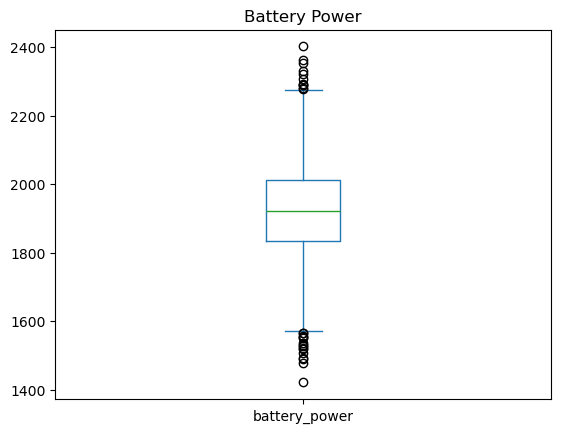

In [211]:
df['battery_power'].plot(kind='box', title="Battery Power")

<Axes: title={'center': 'Clock Speed'}>

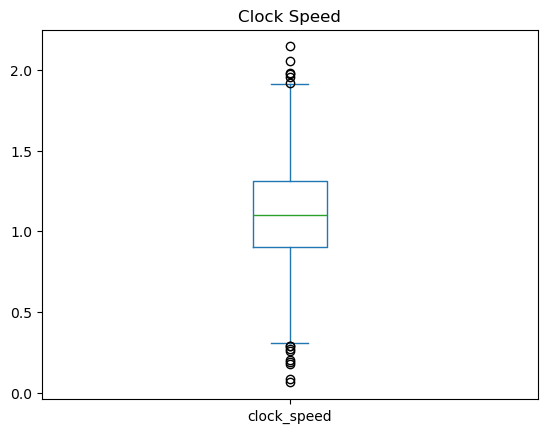

In [212]:
df['clock_speed'].plot(kind='box', title="Clock Speed")

<Axes: title={'center': 'RAM'}>

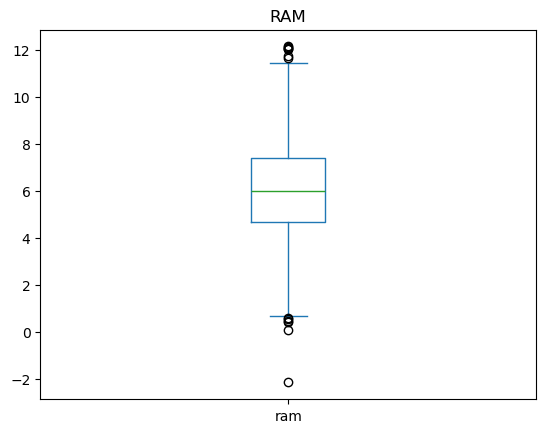

In [213]:
df['ram'].plot(kind='box', title="RAM")

<Axes: title={'center': 'Number of Cores'}>

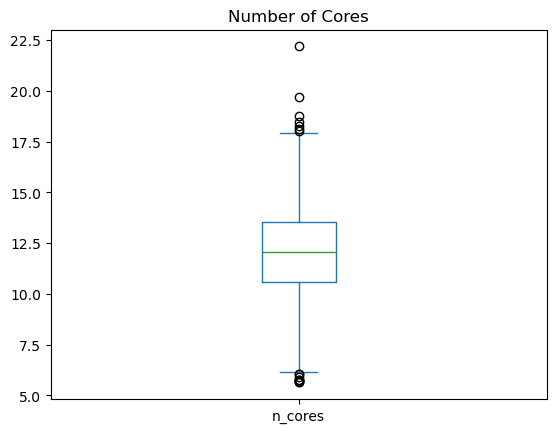

In [214]:
df['n_cores'].plot(kind='box', title="Number of Cores")

<Axes: title={'center': 'Use Time'}>

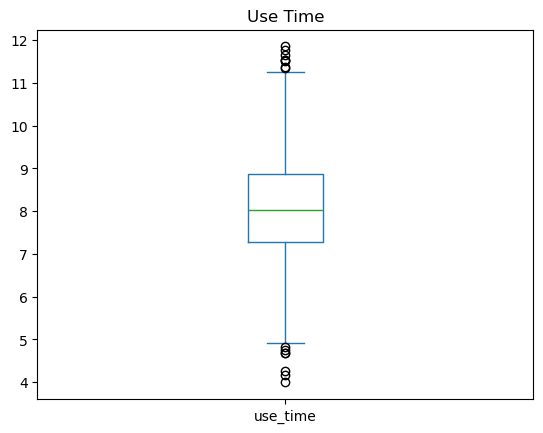

In [215]:
df['use_time'].plot(kind='box', title="Use Time")

<Axes: title={'center': 'Width (pixels)'}>

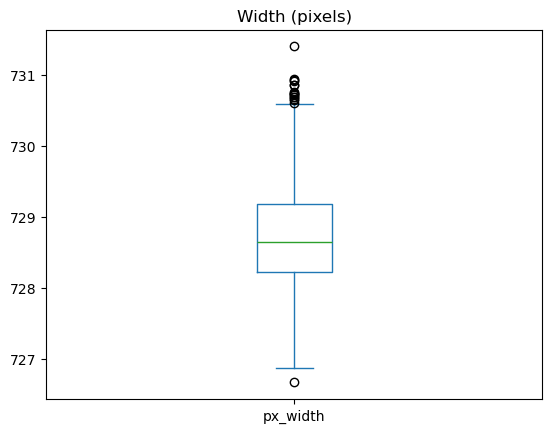

In [216]:
df['px_width'].plot(kind='box', title="Width (pixels)")

<Axes: title={'center': 'Height (pixels)'}>

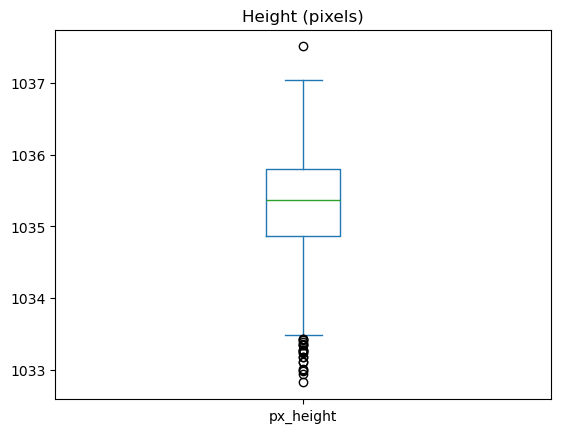

In [217]:
df['px_height'].plot(kind='box', title="Height (pixels)")

<Axes: title={'center': '5G Bandwidth'}>

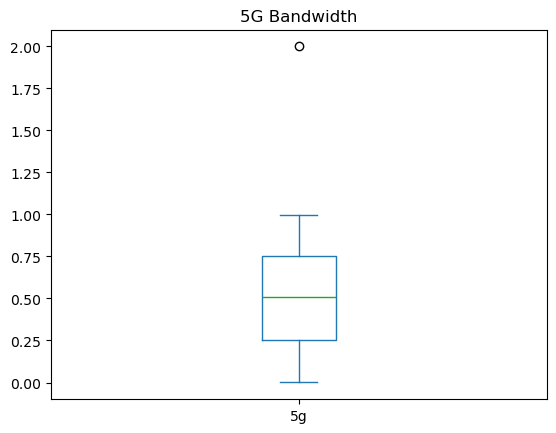

In [218]:
df['5g'].plot(kind='box', title="5G Bandwidth")

<Axes: title={'center': 'Price'}>

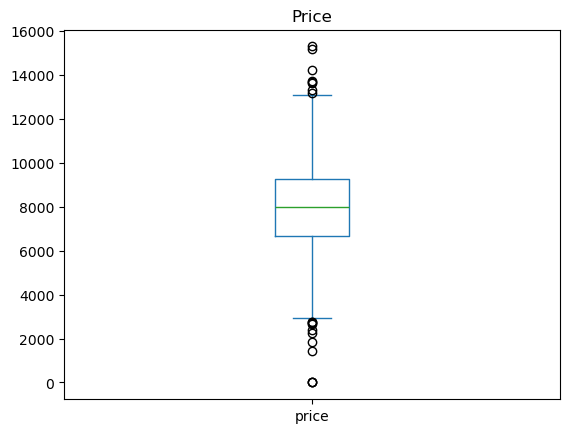

In [219]:
df['price'].plot(kind='box', title="Price")

In [220]:
# Helper function to calculate IQR and bounds
def calculate_bounds(array):
    array.sort()
    q1 = round(0.25 * (len(array) + 1)) - 1
    q3 = round(0.75 * (len(array) + 1)) - 1
    iqr = array[q3] - array[q1]
    print(f"Q1: {array[q1]}")
    print(f"Q3: {array[q3]}")
    print(f"IQR: {iqr}")
    lower_bound = array[q1] - 1.5 * iqr
    upper_bound = array[q3] + 1.5 * iqr
    return lower_bound, upper_bound

In [221]:
# Calculate bounds for each array
print("Battery Power")
bounds_bat = calculate_bounds(batteryArray)
print("\nClock Speed")
bounds_clock = calculate_bounds(clockSpeedArray)
print("\nRAM")
bounds_ram = calculate_bounds(ramArray)
print("\n# of Cores")
bounds_ncore = calculate_bounds(nCoresArray)
print("\nUse Time")
bounds_usetime = calculate_bounds(useTimeArray)
print("\nWidth")
bounds_width = calculate_bounds(widthArray)
print("\nHeight")
bounds_height = calculate_bounds(heightArray)
print("\n5G Bandwidth")
bounds_5g = calculate_bounds(fivegArray)
print("\nPrice")
bounds_price = calculate_bounds(priceArray)

# Create masks for each array
mask_bat = (df['battery_power'] >= bounds_bat[0]) & (df['battery_power'] <= bounds_bat[1])
mask_clock = (df['clock_speed'] >= bounds_clock[0]) & (df['clock_speed'] <= bounds_clock[1])
mask_ram = (df['ram'] >= bounds_ram[0]) & (df['ram'] <= bounds_ram[1])
mask_ncore = (df['n_cores'] >= bounds_ncore[0]) & (df['n_cores'] <= bounds_ncore[1])
mask_usetime = (df['use_time'] >= bounds_usetime[0]) & (df['use_time'] <= bounds_usetime[1])
mask_width = (df['px_width'] >= bounds_width[0]) & (df['px_width'] <= bounds_width[1])
mask_height = (df['px_height'] >= bounds_height[0]) & (df['px_height'] <= bounds_height[1])
mask_brand = (df['brand'] != "undefined")
mask_5g = (df['5g'] >= bounds_5g[0]) & (df['5g'] <= bounds_5g[1])
mask_price = (df['price'] >= bounds_price[0]) & (df['price'] <= bounds_price[1])

# Combine masks
final_mask = mask_bat & mask_clock & mask_ram & mask_ncore & mask_usetime & mask_width & mask_brand & mask_height & mask_5g & mask_price

# Filter DataFrame
df_filtered = df[final_mask]

Battery Power
Q1: 1833.8684847384684
Q3: 2011.328071457394
IQR: 177.4595867189255

Clock Speed
Q1: 0.902701814029262
Q3: 1.3091332476167523
IQR: 0.40643143358749034

RAM
Q1: 4.689465716165617
Q3: 7.416067158135769
IQR: 2.7266014419701525

# of Cores
Q1: 10.5564876455369
Q3: 13.543508639622672
IQR: 2.987020994085773

Use Time
Q1: 7.278577914082928
Q3: 8.872259429695514
IQR: 1.5936815156125865

Width
Q1: 728.2284941364907
Q3: 729.1774660487883
IQR: 0.9489719122976794

Height
Q1: 1034.860955029187
Q3: 1035.7929374790829
IQR: 0.9319824498959406

5G Bandwidth
Q1: 0.2557624819074696
Q3: 0.7568483317625406
IQR: 0.501085849855071

Price
Q1: 6650.555712238094
Q3: 9250.347193985735
IQR: 2599.7914817476412


### Re-initialize arrays with filtered data

In [222]:
dataFiltered = df_filtered.to_numpy()

batteryArray.clear()
clockSpeedArray.clear()
ramArray.clear()
nCoresArray.clear()
useTimeArray.clear()
widthArray.clear()
heightArray.clear()
dimensionArray.clear()
brandArray.clear()
fivegArray.clear()
gradeArray.clear()
priceArray.clear()

for data in dataFiltered:
    batteryArray.append(data[1])
    clockSpeedArray.append(data[2])
    ramArray.append(data[3])
    nCoresArray.append(data[4])
    useTimeArray.append(data[5])
    widthArray.append(data[6])
    heightArray.append(data[7])
    dimensionArray.append(data[6] * data[7])
    brandArray.append(data[8])
    fivegArray.append(data[9])
    gradeArray.append(data[10])
    priceArray.append(data[11])

### Calculate descriptive statistics

#### Battery

In [268]:
batteryMean = sum(batteryArray) / len(batteryArray)
print(f"Mean: {batteryMean}")
print(f"Median: {statistics.median(batteryArray)}")
print(f"Mode: {statistics.mode(batteryArray)}")

variance = 0
for battery in batteryArray:
    variance += math.pow((battery - batteryMean), 2)
variance /= len(batteryArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(batteryArray)}")
print(f"Maximum: {max(batteryArray)}")

q1 = round(0.25 * (len(batteryArray) + 1))
q3 = round(0.75 * (len(batteryArray) + 1))

skewness = 0
kurtosis = 0
for battery in batteryArray:
    skewness += math.pow((battery - batteryMean), 3)
    kurtosis += math.pow((battery - batteryMean), 4)
skewness /= (len(batteryArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(batteryArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 1922.4902555054327
Median: 1924.1016886240604
Mode: 1908.9840881818127
Variance: 16580.310873427494
Standard Deviation: 128.76455596718955
Minimum: 1571.1202364293008
Maximum: 2277.23806463553
Skewness: -0.01412733607110546
Kurtosis: 2.785486703608082


<Axes: title={'center': 'Battery Power'}, ylabel='Density'>

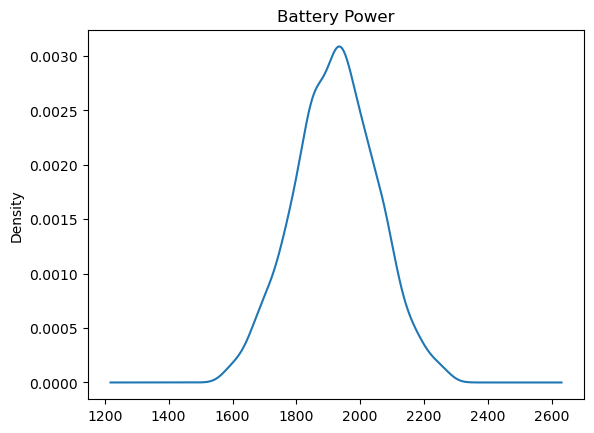

In [224]:
df_filtered['battery_power'].plot(kind='kde', title='Battery Power')

<Axes: title={'center': 'Battery Power'}, ylabel='Frequency'>

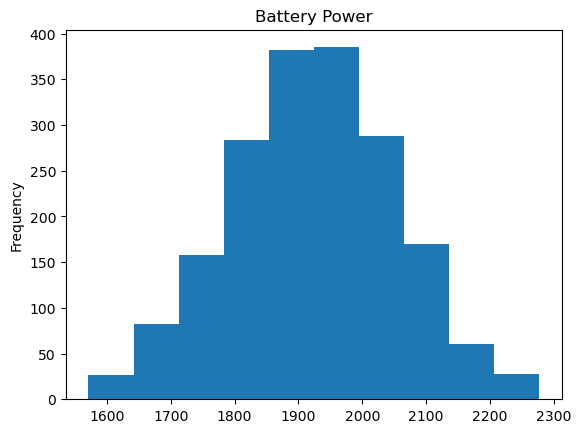

In [225]:
df_filtered['battery_power'].plot(kind='hist', title='Battery Power')

#### Clock Speed

In [257]:
clockSpeedMean = sum(clockSpeedArray) / len(clockSpeedArray)
print(f"Mean: {clockSpeedMean}")
print(f"Median: {statistics.median(clockSpeedArray)}")
print(f"Mode: {statistics.mode(clockSpeedArray)}")

variance = 0
for clockSpeed in clockSpeedArray:
    variance += math.pow((clockSpeed - clockSpeedMean), 2)
variance /= len(clockSpeedArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(clockSpeedArray)}")
print(f"Maximum: {max(clockSpeedArray)}")

skewness = 0
kurtosis = 0
for clockSpeed in clockSpeedArray:
    skewness += math.pow((clockSpeed - clockSpeedMean), 3)
    kurtosis += math.pow((clockSpeed - clockSpeedMean), 4)
skewness /= (len(clockSpeedArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(clockSpeedArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['clock_speed'])
print(res)

Mean: 1.1023954377531386
Median: 1.095997194578974
Mode: 0.9431593599626056
Variance: 0.084754754245495
Standard Deviation: 0.291126697926341
Minimum: 0.3076566370634803
Maximum: 1.917130586529546
Skewness: -0.0019605496660599553
Kurtosis: 2.805145228657289
NormaltestResult(statistic=3.348863123097763, pvalue=0.18741468292084068)


<Axes: title={'center': 'Clock Speed'}, ylabel='Density'>

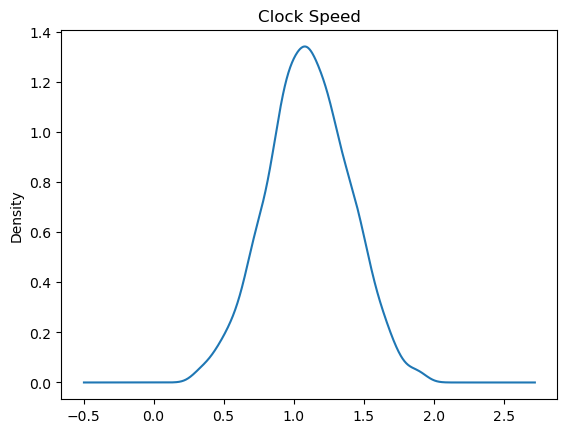

In [227]:
df_filtered['clock_speed'].plot(kind='kde', title="Clock Speed")

<Axes: title={'center': 'Clock Speed'}, ylabel='Frequency'>

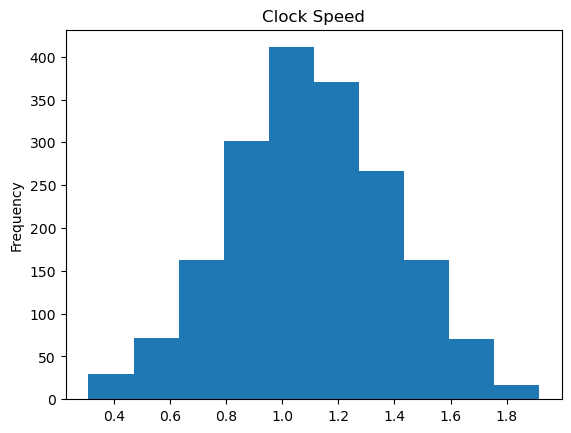

In [228]:
df_filtered['clock_speed'].plot(kind='hist', title="Clock Speed")

#### RAM

In [258]:
ramMean = sum(ramArray) / len(ramArray)
print(f"Mean: {ramMean}")
print(f"Median: {statistics.median(ramArray)}")
print(f"Mode: {statistics.mode(ramArray)}")

variance = 0
for ram in ramArray:
    variance += math.pow((ram - ramMean), 2)
variance /= len(ramArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(ramArray)}")
print(f"Maximum: {max(ramArray)}")

skewness = 0
kurtosis = 0
for ram in ramArray:
    skewness += math.pow((ram - ramMean), 3)
    kurtosis += math.pow((ram - ramMean), 4)
skewness /= (len(ramArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(ramArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['ram'])
print(res)

Mean: 6.056550228037375
Median: 6.016747940727095
Mode: 5.687524374104278
Variance: 3.785624185230894
Standard Deviation: 1.9456680562806428
Minimum: 0.7013605146135955
Maximum: 11.464016228695463
Skewness: 0.08145717927238547
Kurtosis: 2.6947692839773234
NormaltestResult(statistic=11.782431809501094, pvalue=0.002763614361358552)


<Axes: title={'center': 'RAM'}, ylabel='Density'>

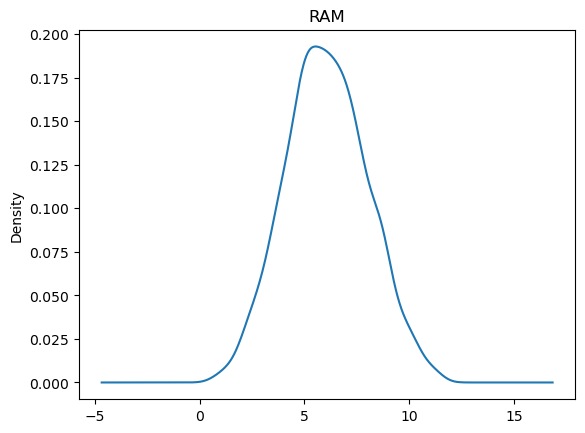

In [230]:
df_filtered['ram'].plot(kind='kde', title="RAM")

<Axes: title={'center': 'RAM'}, ylabel='Frequency'>

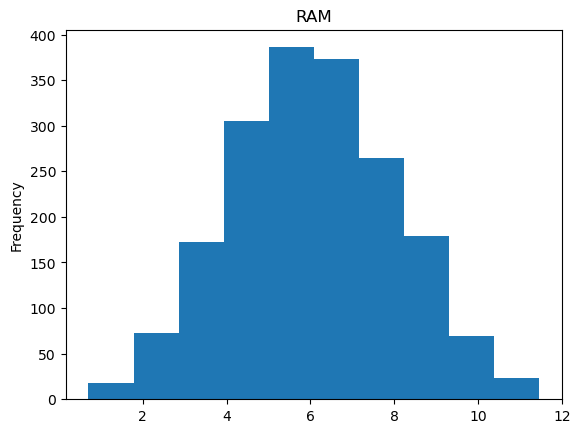

In [231]:
df_filtered['ram'].plot(kind='hist', title="RAM")

#### # of Cores

In [259]:
nCoresMean = sum(nCoresArray) / len(nCoresArray)
print(f"Mean: {nCoresMean}")
print(f"Median: {statistics.median(nCoresArray)}")
print(f"Mode: {statistics.mode(nCoresArray)}")

variance = 0
for nCores in nCoresArray:
    variance += math.pow((nCores - nCoresMean), 2)
variance /= len(nCoresArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(nCoresArray)}")
print(f"Maximum: {max(nCoresArray)}")

skewness = 0
kurtosis = 0
for nCores in nCoresArray:
    skewness += math.pow((nCores - nCoresMean), 3)
    kurtosis += math.pow((nCores - nCoresMean), 4)
skewness /= (len(nCoresArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(nCoresArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['n_cores'])
print(res)

Mean: 12.03482623990023
Median: 12.058634408791011
Mode: 12.212481431064566
Variance: 4.6805228356526785
Standard Deviation: 2.1634516023365715
Minimum: 6.146934490670779
Maximum: 18.01761353995157
Skewness: -0.006174459974329358
Kurtosis: 2.649619556338422
NormaltestResult(statistic=13.672386367654505, pvalue=0.0010741848503050858)


<Axes: title={'center': 'Number of Cores'}, ylabel='Density'>

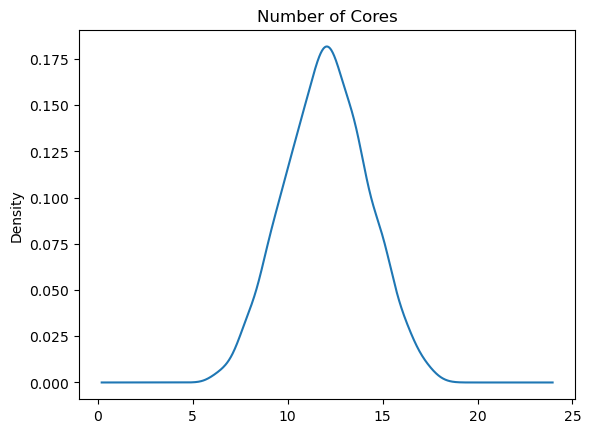

In [233]:
df_filtered['n_cores'].plot(kind='kde', title="Number of Cores")

<Axes: title={'center': 'Number of Cores'}, ylabel='Frequency'>

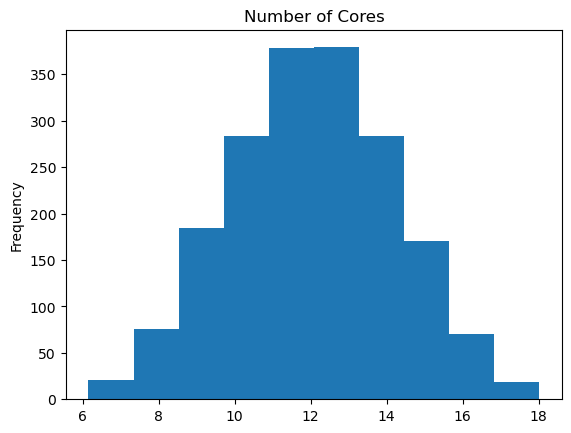

In [234]:
df_filtered['n_cores'].plot(kind='hist', title="Number of Cores")

#### Use Time

In [264]:
useTimeMean = sum(useTimeArray) / len(useTimeArray)
print(f"Mean: {useTimeMean}")
print(f"Median: {statistics.median(useTimeArray)}")
print(f"Mode: {statistics.mode(useTimeArray)}")

variance = 0
for useTime in useTimeArray:
    variance += math.pow((useTime - useTimeMean), 2)
variance /= len(useTimeArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(useTimeArray)}")
print(f"Maximum: {max(useTimeArray)}")

skewness = 0
kurtosis = 0
for useTime in useTimeArray:
    skewness += math.pow((useTime - useTimeMean), 3)
    kurtosis += math.pow((useTime - useTimeMean), 4)
skewness /= (len(useTimeArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(useTimeArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['use_time'])
print(res)

Mean: 8.03162617127296
Median: 8.013404959567467
Mode: 6.239332481634245
Variance: 1.3172261767332885
Standard Deviation: 1.1477047428381955
Minimum: 4.916292578755781
Maximum: 11.248337150073892
Skewness: -0.08727333904942625
Kurtosis: 2.735222281069576
NormaltestResult(statistic=9.264568831132406, pvalue=0.009732500612305274)


<Axes: title={'center': 'Use Time'}, ylabel='Density'>

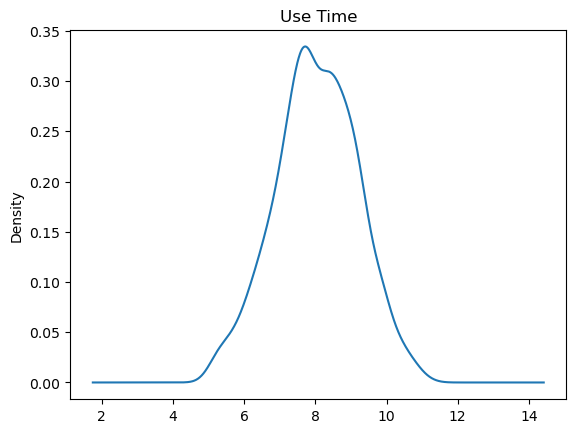

In [236]:
df_filtered['use_time'].plot(kind='kde', title="Use Time")

<Axes: title={'center': 'Use Time'}, ylabel='Frequency'>

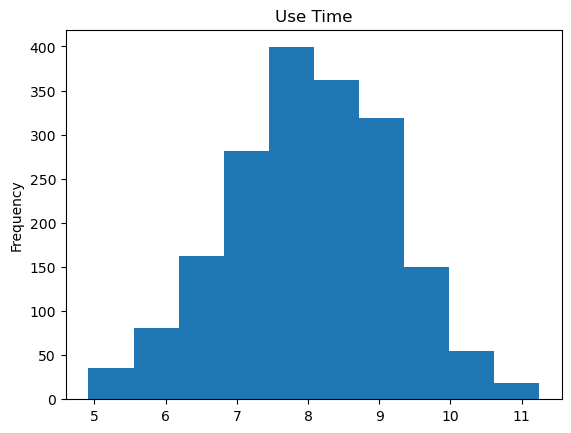

In [237]:
df_filtered['use_time'].plot(kind='hist', title="Use Time")

#### Width

In [262]:
widthMean = sum(widthArray) / len(widthArray)
print(f"Mean: {widthMean}")
print(f"Median: {statistics.median(widthArray)}")
print(f"Mode: {statistics.mode(widthArray)}")

variance = 0
for width in widthArray:
    variance += math.pow((width - widthMean), 2)
variance /= len(widthArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(widthArray)}")
print(f"Maximum: {max(widthArray)}")

skewness = 0
kurtosis = 0
for width in widthArray:
    skewness += math.pow((width - widthMean), 3)
    kurtosis += math.pow((width - widthMean), 4)
skewness /= (len(widthArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(widthArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['px_width'])
print(res)

Mean: 728.6980069064422
Median: 728.6251580579568
Mode: 728.675566341065
Variance: 0.45159352396556574
Standard Deviation: 0.6720070862465408
Minimum: 726.8772065916139
Maximum: 730.595880936301
Skewness: 0.28508503326195556
Kurtosis: 2.75285013347441
NormaltestResult(statistic=30.33574645624359, pvalue=2.5862848441574504e-07)


<Axes: title={'center': 'Width (pixels)'}, ylabel='Density'>

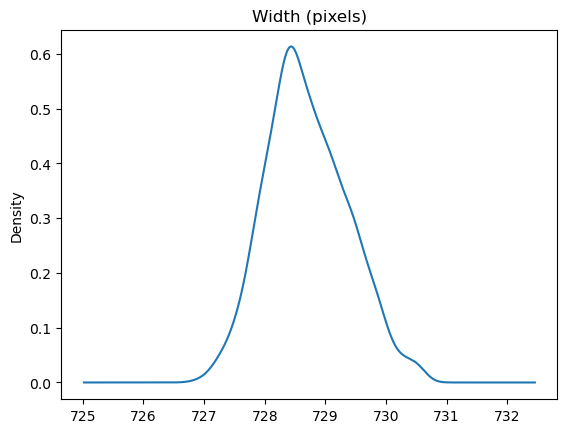

In [239]:
df_filtered['px_width'].plot(kind='kde', title="Width (pixels)")

<Axes: title={'center': 'Width (pixels)'}, ylabel='Frequency'>

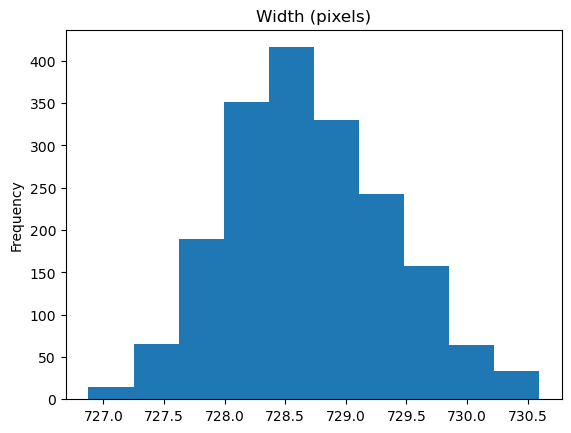

In [240]:
df_filtered['px_width'].plot(kind='hist', title="Width (pixels)")

#### Height

In [265]:
heightMean = sum(heightArray) / len(heightArray)
print(f"Mean: {heightMean}")
print(f"Median: {statistics.median(heightArray)}")
print(f"Mode: {statistics.mode(heightArray)}")

variance = 0
for height in heightArray:
    variance += math.pow((height - heightMean), 2)
variance /= len(heightArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(heightArray)}")
print(f"Maximum: {max(heightArray)}")

skewness = 0
kurtosis = 0
for height in heightArray:
    skewness += math.pow((height - heightMean), 3)
    kurtosis += math.pow((height - heightMean), 4)
skewness /= (len(heightArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(heightArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['px_height'])
print(res)

Mean: 1035.3195134224388
Median: 1035.3724529197696
Mode: 1035.5268927511402
Variance: 0.44296506777970546
Standard Deviation: 0.6655562093314925
Minimum: 1033.481904408974
Maximum: 1037.0387781495165
Skewness: -0.2960711912718628
Kurtosis: 2.738973869349258
NormaltestResult(statistic=32.994734612183976, pvalue=6.84359677592619e-08)


<Axes: title={'center': 'Height (pixels)'}, ylabel='Density'>

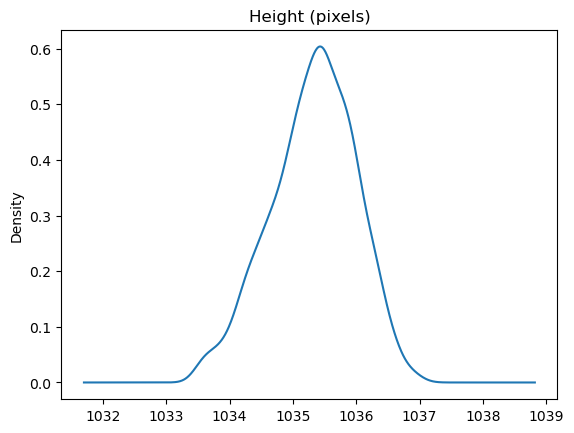

In [242]:
df_filtered['px_height'].plot(kind='kde', title="Height (pixels)")

<Axes: title={'center': 'Height (pixels)'}, ylabel='Frequency'>

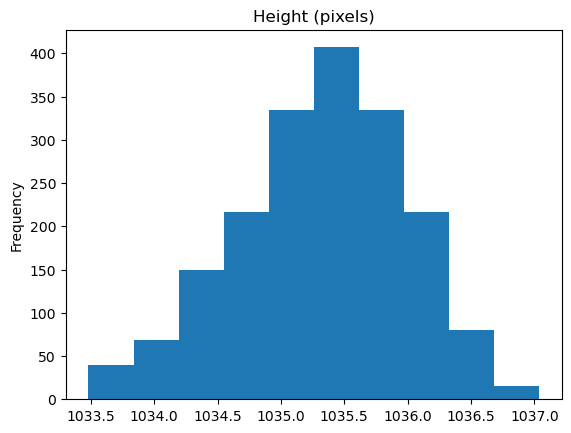

In [243]:
df_filtered['px_height'].plot(kind='hist', title="Height (pixels)")

#### Descriptive Statistics

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 754436.9105020199 | 754391.0964893175 | 751666.1515091602 | 778255.8073212984 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 882.1880793352959 | 751666.1515091602 | 758119.092960782 | 6452.941451621824 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 753845.106684428 | 755029.2146233626 | 1184.1079389345832 | 0.16681583186848162 |

|      Kurtosis      |
|:------------------:|
| 3.0615741181192595 |

#### Brands

brand
sumseng     631
oranye      445
largeyou    399
appa        389
Name: count, dtype: int64


<Axes: title={'center': 'Brands'}, xlabel='brand'>

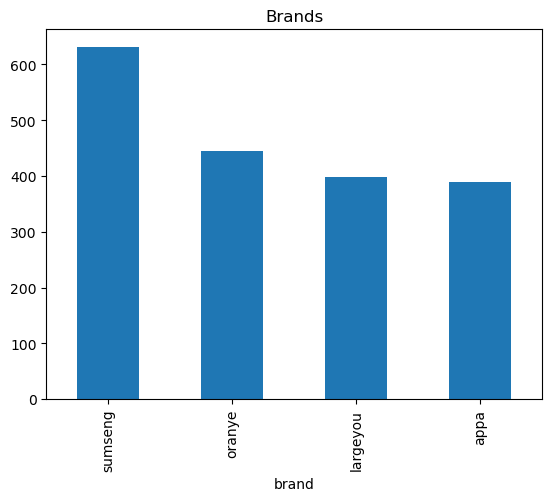

In [244]:
brands = df_filtered.brand.value_counts()
print(brands)
brands.plot(kind='bar', title="Brands")

#### 5G Bandwidth

In [266]:
fivegMean = sum(fivegArray) / len(fivegArray)
print(f"Mean: {fivegMean}")
print(f"Median: {statistics.median(fivegArray)}")
print(f"Mode: {statistics.mode(fivegArray)}")

variance = 0
for fiveg in fivegArray:
    variance += math.pow((fiveg - fivegMean), 2)
variance /= len(fivegArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(fivegArray)}")
print(f"Maximum: {max(fivegArray)}")

skewness = 0
kurtosis = 0
for fiveg in fivegArray:
    skewness += math.pow((fiveg - fivegMean), 3)
    kurtosis += math.pow((fiveg - fivegMean), 4)
skewness /= (len(fivegArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(fivegArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['px_height'])
print(res)

Mean: 0.5067236559841637
Median: 0.5076084304299213
Mode: 0.8656227281593587
Variance: 0.08225252328829417
Standard Deviation: 0.2867970071118145
Minimum: 0.0001472366748813
Maximum: 0.9992159847023164
Skewness: 0.0005962491854400886
Kurtosis: 1.809479644564727
NormaltestResult(statistic=32.994734612183976, pvalue=6.84359677592619e-08)


<Axes: title={'center': '5G Bandwidth'}, ylabel='Density'>

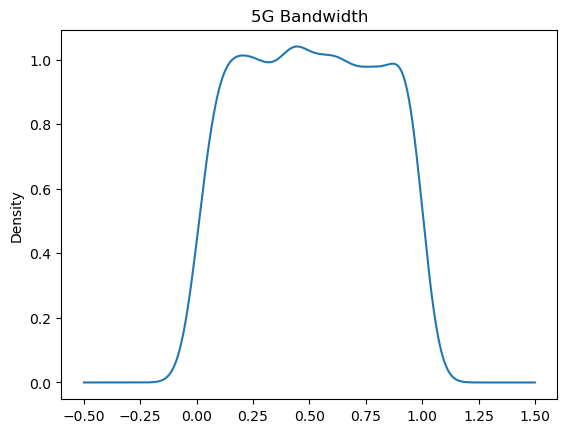

In [246]:
df_filtered['5g'].plot(kind='kde', title="5G Bandwidth")

<Axes: title={'center': '5G Bandwidth'}, ylabel='Frequency'>

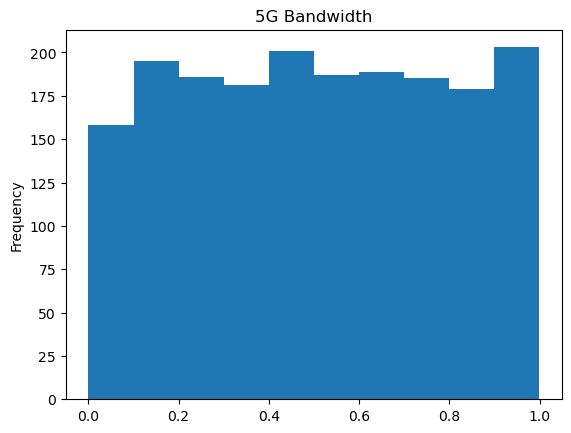

In [247]:
df_filtered['5g'].plot(kind='hist', title="5G Bandwidth")

#### Grades

grade
A    655
B    633
C    576
Name: count, dtype: int64


<Axes: title={'center': 'Grades'}, xlabel='grade'>

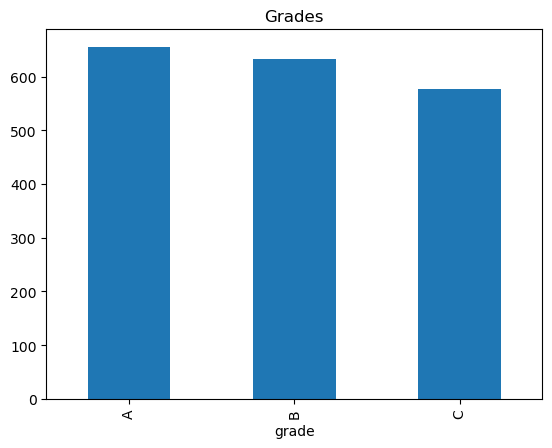

In [248]:
grades = df_filtered.grade.value_counts()
print(grades)
grades.plot(kind='bar', title="Grades")

#### Price

In [267]:
priceMean = sum(priceArray) / len(priceArray)
print(f"Mean: {priceMean}")
print(f"Median: {statistics.median(priceArray)}")
print(f"Mode: {statistics.mode(priceArray)}")

variance = 0
for price in priceArray:
    variance += math.pow((price - priceMean), 2)
variance /= len(priceArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(priceArray)}")
print(f"Maximum: {max(priceArray)}")

skewness = 0
kurtosis = 0
for price in priceArray:
    skewness += math.pow((price - priceMean), 3)
    kurtosis += math.pow((price - priceMean), 4)
skewness /= (len(priceArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(priceArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

res = stats.normaltest(df_filtered['price'])
print(res)

Mean: 7977.922042292509
Median: 7995.489727204867
Mode: 8106.876568456718
Variance: 3701899.4147668974
Standard Deviation: 1924.0320721773057
Minimum: 2765.9466625979912
Maximum: 13075.76979105915
Skewness: 0.00443623572325081
Kurtosis: 2.760187650127677
NormaltestResult(statistic=5.449578021110164, pvalue=0.06556003373400017)


<Axes: title={'center': 'Price'}, ylabel='Density'>

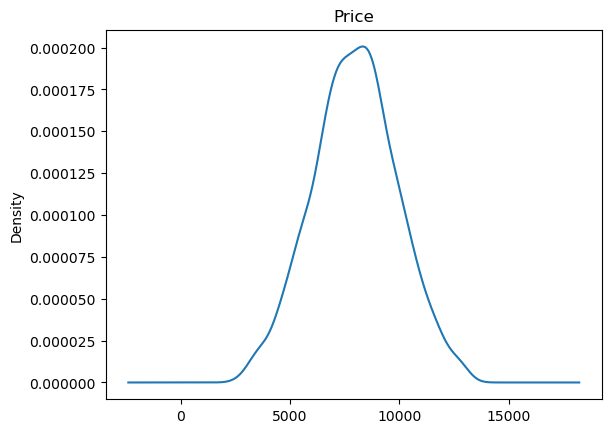

In [250]:
df_filtered['price'].plot(kind='kde', title="Price")

<Axes: title={'center': 'Price'}, ylabel='Frequency'>

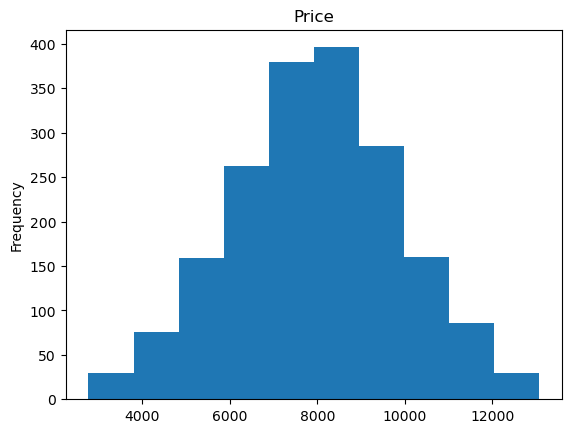

In [251]:
df_filtered['price'].plot(kind='hist', title="Price")

|  Attributes  |        Mean        | Median             | Mode               | Standard Deviation | Variance           | Max               | Min                | Range | Q1                | Q3                 | IQR                | Skewness             | Kurtosis          |
|:------------:|:------------------:|--------------------|--------------------|--------------------|--------------------|-------------------|--------------------|-------|-------------------|--------------------|--------------------|----------------------|-------------------|
| Battery      | 1920.8772990476161 | 1922.3991535760729 | 1420.9542711910349 | 18562.603584965633 | 136.24464607816938 | 2401.957818060511 | 1420.9542711910349 |       | 1834.063419467561 | 2011.5258949112035 | 177.46247544364246 | -0.04125989909102238 | 3.217242119865875 |
| Clock Speed  |                    |                    |                    |                    | ssss               |                   |                    |       |                   |                    |                    |                      |                   |
| RAM          |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| # of Cores   |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| Use Time     |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| Width        |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| Height       |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| Dimension    |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| 5G Bandwidth |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| Price        |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |

### Normality of Distribution

There are two parameters that we can use to measure the normality of a distribution.\
\
The first parameter is skewness. Skewness is defined as a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value s of a distribution can be interpreted as such
- s < 0 (negative skew)\
The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.
- s = 0\
The mass of the distribution is perfectly balanced on both side with the value of the mean being equal to that of the median and mode.
- s > 0 (positive skew)\
The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.


The second parameter is kurtosis. Kurtosis is defined as a statistical measure that quantifies the shape of a probability distribution. It provides information about the tails and peakedness of the distribution compared to a normal distribution. The kurtosis value k of a distribution can be interpreted as such
- k < 3 (leptokurtic)\
A distribution with leptokurtic kurtosis has heavier tails and a sharper peak than the normal distribution. It has a positive kurtosis value, indicating that it has more extreme outliers than a normal distribution. This type of distribution is often associated with higher peakedness and a greater probability of extreme values.
- k = 3 (mesokurtic)\
A distribution with mesokurtic kurtosis has a similar peak and tail shape as the normal distribution. It has a kurtosis value of around 3, indicating that its tails are neither too heavy nor too light compared to a normal distribution.
- k > 3 (platykurtic)\
A distribution with platykurtic kurtosis has lighter tails and a flatter peak than the normal distribution. It has a negative kurtosis value, indicating that it has fewer extreme outliers than a normal distribution. This type of distribution is often associated with less peakedness and a lower probability of extreme values.

A distribution is said to be a perfect normal distribution if it fulfills s = 0 AND k = 3. However, there are no fixed definition in determining the normality of a certain distribution as the p-value must be defined arbitrarily by the user. In this case, let us assume p = 0.05.

In [274]:
#D'Agostino and Pearson's test with scipy.stats.normaltest
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#id2

#H0 : Distribution is normal
#H1 : Distribution is not normal
p = 0.05

res = stats.normaltest(df_filtered['battery_power'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"{res[1]} < {p}")
    print(f"Distribution of battery_power is not a normal distribution")
else: #Reject H1, accept H0
    print(f"{res[1]} > {p}")
    print(f"Distribution of battery_power is a normal distribution")

res = stats.normaltest(df_filtered['clock_speed'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of clock_speed is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of clock_speed is a normal distribution")

res = stats.normaltest(df_filtered['ram'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of ram is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of ram is a normal distribution")

res = stats.normaltest(df_filtered['n_cores'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of n_cores is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of n_cores is a normal distribution")

res = stats.normaltest(df_filtered['use_time'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of use_time is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of use_time is a normal distribution")
    
res = stats.normaltest(df_filtered['px_width'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of px_width is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of px_width is a normal distribution")

res = stats.normaltest(df_filtered['px_height'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of px_height is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of px_height is a normal distribution")

res = stats.normaltest(df_filtered['5g'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of 5g is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of 5g is a normal distribution")

res = stats.normaltest(df_filtered['price'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of price is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of price is a normal distribution")

0.11938518468695045 > 0.05
Distribution of battery_power is a normal distribution

0.18741468292084068 > 0.05
Distribution of clock_speed is a normal distribution

0.002763614361358552 < 0.05
Distribution of ram is not a normal distribution

0.0010741848503050858 < 0.05
Distribution of n_cores is not a normal distribution

0.009732500612305274 < 0.05
Distribution of use_time is not a normal distribution

2.5862848441574504e-07 < 0.05
Distribution of px_width is not a normal distribution

6.84359677592619e-08 < 0.05
Distribution of px_height is not a normal distribution

5.753298265781992e-299 < 0.05
Distribution of 5g is not a normal distribution

0.06556003373400017 > 0.05
Distribution of price is a normal distribution


## Hipotesis 1 Sampel
- Testimoni dari pengguna banyak yang menyatakan bahwa kapasitas baterai yang digunakan kurang dari sewajarnya. Periksa apakah battery_power memiliki rata-rata di atas 1800?
- Standar RAM yang dimiliki oleh suatu smartphone sekarang adalah 8 GB. Periksalah apakah rata-rata ram smartphone pada dataset adalah 8 GB?
- Periksa apakah 250 data pertama pada dataset memiliki rata-rata kecepatan clocking (clock_speed) tidak sama dengan 1!
- Periksalah apakah data smartphone dengan merek “appa” yang memiliki rata-rata waktu penggunaan (use_time) lebih dari 8.5 tidak sama dengan 35% dari data keseluruhan?

## Hipotesis 2 Sampel
Markuis berasumsi setengah bagian pertama dataset adalah smartphone generasi sebelumnya dan setengah bagian terakhir adalah smartphone generasi sekarang.

- Periksa apakah rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang?
- Bagaimana dengan harga smartphone, apakah harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya?
- Apakah variansi dari tinggi smartphone (px_height) sama pada kedua generasi?
- Apakah proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang?
